# Amazon Products Reviews Classification

### Contents
- Abstract
- Dataset
- Goal
1. Preparation
    - Packages
    - Loading Dataset
2. Text Features
    - CountVectorizer + MultinomialNB
    - TfidfVectorizer + MultinomialNB
    - CountVectorizer + MultinomialNB w/o stopwords
    - TfidfVectorizer + MultinomialNB w/o stopwords
    - CountVectorizer + MultinomialNB lemmatized
    - Model Comparison
3. Deep Learning
    - LSTM
4. Overall Comparison

5. Conclusion

****************************************

### Abstract
Amazon.com, Inc. is an American multinational technology company which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook. The company has been referred to as "one of the most influential economic and cultural forces in the world", as well as the world's most valuable brand.

Jeff Bezos founded Amazon from his garage in Bellevue, Washington,on July 5, 1994. 
Sentiment analysis is a NLP task which aims to classify a text based on the sentiment it conveys, aka its *polarity* (whether it is positive, neutral or negative). A typical business-oriented application is to analyze product reviews and customer feedbacks.

The dataset which we investigate contains tens of thousands of Amazon reviews, which have been labeled as positive or negative by looking at the score given by users. We show different approaches to the problem of sorting them in the correct class based on the content of the review, both using text-feature extraction and deep learning.

### Dataset
The dataset is collected from the Kaggle website. Here is the link : https://www.kaggle.com/kritanjalijain/amazon-reviews?select=train.csv

### Goal
The goal of this project is to make a classifiation model which will classify the products review enlisted in the Amazon Inc website, so that it can help the company for their betterment, and also they can rectify their faults depending on the users' experience.
*********************************************

## 1. Preparation <a id=1></a>

### 1.1 Packages <a id=1.1></a>

In [18]:
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline

# import nltk
# from nltk.corpus import stopwords
import spacy
import langid

import plotly
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.set_config_file(sharing='public',theme='white',offline=True)

#import fastbook
#fastbook.setup_book()

from fastai.text.all import *
#from fastbook import *

warnings.filterwarnings(action='ignore', category=UserWarning)

### 1.2 Data <a id=1.2></a>

In [4]:
# prompt: pip install opendatsets and load

%pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?select=amazon_review_polarity_csv.tgz")

  Using cached opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)
  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/163.4 kB ? eta -:--:--
   --------------- ------------------------ 61.4/163.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 163.4/163.4 kB 2.4 MB/s eta 0:00:00
Using cached python_slugify-8.0.4-py2.py3-none-


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews


100%|██████████| 1.29G/1.29G [02:49<00:00, 8.20MB/s]


In [7]:
import tarfile

# Replace with the path to your downloaded .tgz file
tar_file_path = r"D:\PyCham_Projects\Amazon_Products_Reviews_Classification\amazon-reviews\amazon_review_polarity_csv.tgz"

# Extract the contents of the .tgz file
with tarfile.open(tar_file_path, "r:gz") as tar:
    tar.extractall(path="/content/")

C:\Users\0911a\AppData\Local\Temp\ipykernel_23440\1284002046.py:8: DeprecationWarning:

Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.



In [1]:
# prompt: read csv  form train test
# /content/amazon_review_polarity_csv

import pandas as pd

train_df = pd.read_csv(r'D:\PyCham_Projects\Amazon_Products_Reviews_Classification\amazon-reviews\train.csv', header=None, names=['label', 'title','text'])
test_df = pd.read_csv(r'D:\PyCham_Projects\Amazon_Products_Reviews_Classification\amazon-reviews\test.csv', header=None, names=['label', 'title','text'])

In [2]:
train_df

,label,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [3]:
test_df

,label,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [7]:


# Assuming train_df and test_df are already defined as in your code

train_df = train_df.sample(n=100000, random_state=42,replace=True).reset_index(drop=True)
test_df = test_df.sample(n=20000, random_state=42,replace=True).reset_index(drop=True)

In [8]:
file_name = "train_df1.csv"  # Specify the file name
train_df.to_csv(file_name, index=False)  # Set index=False to avoid saving the index column

print(f"DataFrame has been saved to {file_name}")

DataFrame has been saved to train_df1.csv


In [9]:
file_name = "test_df1.csv"  # Specify the file name
test_df.to_csv(file_name, index=False)  # Set index=False to avoid saving the index column

print(f"DataFrame has been saved to {file_name}")

DataFrame has been saved to test_df1.csv


In [10]:
 %pip install "pymongo[srv]"

   ---------------------------------------- 0.0/313.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/313.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/313.6 kB ? eta -:--:--
   --- ----------------------------------- 30.7/313.6 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/313.6 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/313.6 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/313.6 kB 328.6 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/313.6 kB 328.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/313.6 kB 309.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/313.6 kB 309.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/313.6 kB 309.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/313.6 kB 309.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/313.6 kB 309.1 kB/


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = "mongodb+srv://mongodb123:<kumar1491625>@cluster0.h9o5b.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0"

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

bad auth : Authentication failed., full error: {'ok': 0, 'errmsg': 'bad auth : Authentication failed.', 'code': 8000, 'codeName': 'AtlasError'}


The two dataframes have three columns:

`label` - Target variable with two categorical levels: 1 if the review is negative (1/2 stars rating); 2 if the review is positive (4/5 stars rating).

`title` - Heading of the review.

`text` - Body of the review.



In [12]:
train_df['title'].fillna('', inplace=True)
test_df['title'].fillna('', inplace=True)

train_len = 10000
test_len = 1000
rs = 42

df = pd.concat([train_df.loc[train_df['label'] == 1].sample(train_len//2, random_state=rs),
                train_df.loc[train_df['label'] == 2].sample(train_len//2, random_state=rs),
                test_df.loc[test_df['label'] == 1].sample(test_len//2, random_state=rs),
                test_df.loc[test_df['label'] == 2].sample(test_len//2, random_state=rs)]).reset_index(drop=True)
df['text'] = df['title'] + '. ' + df['text']
df.drop('title', axis=1, inplace=True)
df.head()

C:\Users\0911a\AppData\Local\Temp\ipykernel_23440\832602285.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\0911a\AppData\Local\Temp\ipykernel_23440\832602285.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,label,text
0,1,"Started, not finished. I appreciate this as a freshman novel, but this author needed a better editor. With little exception, there is no character development. Some friends and I read it and compiled a LONG list of great character issues and plot twists that were introduced and then never referenced again. One more thing:the coincidences that allow the book to continue until it's long-overdue end are insulting to people of normal intelligence."
1,1,"This thing stinks!!. If you want a device to make your computer to freeze, and not startup, this is the device you are looking for! Oh and did I mention that some of my devices didn't even work on it? And it is UGLY! This is my first and last product from ""Macally""! Don't make the same mistake I did!"
2,1,"Lawless or Hopeless?. This film wanders through the hill country during prohibition. What should be prohibitedis making movies that look like they have a possibility and then never deliver. Don't drinkthis moonshine, it will make you go blind!"
3,1,"Somebodys listened to the Strokes a little too much. Yuck. Well maybe that's too strong a reaction. Rather more like: ........ zzzz. Heard it all before, nothing even remotely original or interesting about this band. I don't necessarily turn it off when I hear it on the radio, but for the most part it's just more top 40 overhyped mush, i.e. it's derivitive and dull. I kept hearing how these guys are the next big thing. If that's true then rock is surely dead. There are better bands out there folks, trust me.Oh yeah, the '80s were TWENTY f-ing years ago, get a clue. What will people say abo..."
4,1,hype. Bought new ear piece for new ipod. Had Koss plugs. Panasonics are awful. Tried all the sizes. Guess I don't have the right ears for these.Koss plugs are great. Reverted back to them and have no desire to upgrade after hearing Panasonics. Are the Sony look alikes any better???


In [13]:
print(f'Label counts - training set:\n{df[:train_len].label.value_counts()}')
print(f'\nLabel counts - validation set:\n{df[train_len:].label.value_counts()}')

Label counts - training set:
label
1    5000
2    5000
Name: count, dtype: int64

Label counts - validation set:
label
1    500
2    500
Name: count, dtype: int64


## 2. Text Features <a id=2></a>

We first try classifying reviews using **text vectorization**: we split the text into tokens and, for each token in the corpus, we count how many times it appears in a review. The counts for each token become the numerical features which we feed to the model. As tokens we will use not only single words, aka 1-grams, but also 2-grams and 3-grams, i.e. sequences of contiguous words of length 2 and 3 respectively.

In [14]:
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(df['text'])
print(f"Number of n-grams in the corpus: {len(cv.vocabulary_)}")

Number of n-grams in the corpus: 992477


We see that our corpus contains 992477 n-grams (for n = 1,2,3). Which are the most frequent ones?

In [ ]:
fts = cv.get_feature_names_out()
freq = cv.transform(df['text'])
gram_counts = np.array(freq.sum(0)).squeeze() #Sums the counts of each n-gram across all documents, resulting in a 1xN matrix, where N is the number of n-grams.

gram_counts_df = pd.DataFrame({
    'n-gram': [fts[i] for i in gram_counts.argsort()],
    'frequency': sorted(gram_counts)
}) #Returns the indices of the n-grams sorted by their frequencies in ascending order.

In [16]:
fts = cv.get_feature_names_out()
freq = cv.transform(df['text'])
gram_counts = np.array(freq.sum(0)).squeeze()

gram_counts_df = pd.DataFrame({'n-gram': [fts[i] for i in gram_counts.argsort()],
                               'count': sorted(gram_counts)})

px.bar(gram_counts_df[-20:], y='n-gram', x='count', title='Most frequent n-grams', orientation='h', height=600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'count=%{x}<br>n-gram=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 4796,  5724,  5728,  5887,  6224,  6287,  6361,  6932,  7438,  7805,
                           8823,  9787, 10109, 15031, 16082, 17272, 19799, 21197, 23685, 44021]),
              'xaxis': 'x',
              'y': array(['as', 'my', 'have', 'book', 'on', 'but', 'with', 'not', 'was', 'you',
                          'that', 'for', 'in', 'is', 'this', 'of', 'it', 'to', 'and', 'the'],
                         dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Most frequent n-grams'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'count'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'n-gram'}}}
})

The 1-grams which appears more frequently in the corpus are unlikely to be particularly meaningful for the classification task at hand. This problem is usually tackled in two ways: we can either remove **stopwords** (i.e. the most frequent words in the language the review is written in, such as pronouns and conjunctions), or normalize the frequency counts based on how often each n-gram appears across the documents in the corpus, e.g. by using **tf-idf** vectorization, in order to penalize tokens that are common in both positive and negative reviews.

Before trying any of these approaches, let us consider as baseline a simple multinomial naive Bayes model which uses the n-gram frequencies (n=1,2,3) from count vectorization as features.

Model: CountVectorizer + MultinomialNB
Number of features: 916886
Accuracy: 0.8860

              precision    recall  f1-score   support

           1       0.86      0.92      0.89       500
           2       0.91      0.85      0.88       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



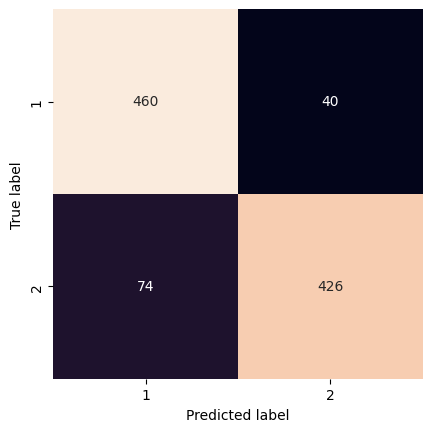

In [19]:
cv_model = make_pipeline(CountVectorizer(ngram_range=(1,3)), MultinomialNB())

x_train, y_train = df['text'][:train_len], df['label'][:train_len].values.reshape(-1,1)
x_test, y_test = df['text'][train_len:], df['label'][train_len:].values.reshape(-1,1)

cv_model.fit(x_train, y_train)
preds = cv_model.predict(x_test)

print("Model: CountVectorizer + MultinomialNB")
print(f"Number of features: {len(cv_model[0].vocabulary_)}")
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, preds)))
mat = confusion_matrix(y_test, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=cv_model.classes_, yticklabels=cv_model.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')

print(classification_report(y_test, preds, labels=cv_model.classes_))

Let's check now how tf-idf vectorization performs.

Model: TfidfVectorizer + MultinomialNB
Number of features: 916886
Accuracy: 0.8820

              precision    recall  f1-score   support

           1       0.85      0.92      0.89       500
           2       0.92      0.84      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



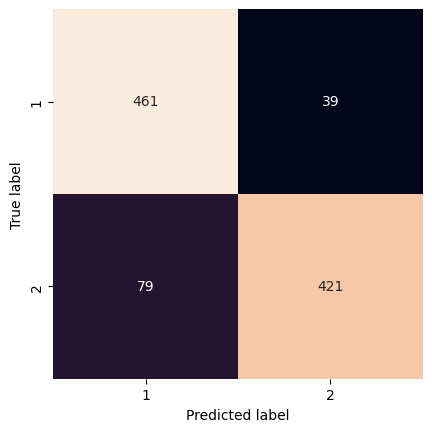

In [20]:
tfidf_model = make_pipeline(TfidfVectorizer(ngram_range=(1,3)), MultinomialNB())

tfidf_model.fit(x_train, y_train)
preds = tfidf_model.predict(x_test)

print("Model: TfidfVectorizer + MultinomialNB")
print(f"Number of features: {len(tfidf_model[0].vocabulary_)}")
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, preds)))
mat = confusion_matrix(y_test, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=tfidf_model.classes_, yticklabels=tfidf_model.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')

print(classification_report(y_test, preds, labels=tfidf_model.classes_))

The two types of vectorization give very similar results. We can try removing stopwords before vectorizing: in order to do so, we need to understand which languages are present in the corpus of reviews. The most frequent n-grams all come from english, but there might also be reviews written in other languages. We use the `langid` library to predict the language of each review in our dataset.

Now we are trying the RandomForestClassifier model

Now we are trying the XGBClassifier model

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Random Forest Pipeline
# rf_model = make_pipeline(TfidfVectorizer(ngram_range=(1, 3)), RandomForestClassifier(random_state=42))

# # Train the model
# rf_model.fit(x_train, y_train)

# # Predictions
# rf_preds = rf_model.predict(x_test)

# # Results
# print("Model: TfidfVectorizer + RandomForestClassifier")
# print(f"Number of features: {len(rf_model[0].vocabulary_)}")
# print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, rf_preds)))

# # Confusion Matrix
# rf_mat = confusion_matrix(y_test, rf_preds)
# sns.heatmap(rf_mat, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.title("Confusion Matrix: RandomForestClassifier")
# plt.show()

# # Classification Report
# print(classification_report(y_test, rf_preds, labels=rf_model.classes_))


In [ ]:
#!pip install xgboost scikit-learn

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder

# # ... (your existing code) ...

# # Before training the XGBoost model, encode the target labels:
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test) # Transform y_test using the same encoder

# # XGBoost Pipeline
# xgb_model = make_pipeline(TfidfVectorizer(ngram_range=(1, 3)), XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))

# # Train the model using the encoded labels
# xgb_model.fit(x_train, y_train_encoded)

# # Predictions
# xgb_preds = xgb_model.predict(x_test)


# # Results
# print("Model: TfidfVectorizer + XGBoostClassifier")
# print(f"Number of features: {len(xgb_model[0].vocabulary_)}")
# print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, xgb_preds)))

# # Confusion Matrix
# xgb_mat = confusion_matrix(y_test, xgb_preds)
# sns.heatmap(xgb_mat, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.title("Confusion Matrix: XGBoostClassifier")
# plt.show()

# # Classification Report
# print(classification_report(y_test, xgb_preds, labels=xgb_model.classes_))


In [21]:
langs = [langid.classify(s)[0] for s in df['text']]
Counter(langs)

Counter({'en': 10962,
         'es': 20,
         'no': 8,
         'fr': 3,
         'pl': 2,
         'pt': 1,
         'fo': 1,
         'et': 1,
         'nl': 1,
         'mt': 1})

Non-english reviews appear to be a very small minority, so we'll simply drop such samples from our dataset.

In [22]:
df = df[[l=='en' for l in langs]]

x_train, y_train = df['text'][:train_len], df['label'][:train_len].values.reshape(-1,1)
x_test, y_test = df['text'][train_len:], df['label'][train_len:].values.reshape(-1,1)

print(f'Label counts - training set:\n{df[:train_len].label.value_counts()}')
print(f'\nLabel counts - validation set:\n{df[train_len:].label.value_counts()}')

Label counts - training set:
label
1    5020
2    4980
Name: count, dtype: int64

Label counts - validation set:
label
2    495
1    467
Name: count, dtype: int64


Let us now try removing english stopwords from the corpus of reviews.

In [25]:
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Load NLTK stop words
sw = stopwords.words('english')

# Initialize CountVectorizer with valid stop_words parameter
cv = CountVectorizer(ngram_range=(1, 3), stop_words=sw)

# Fit the CountVectorizer to the text column in the dataframe
cv.fit(df['text'])
print(f"Number of ngrams in the corpus w/o stopwords: {len(cv.vocabulary_)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of ngrams in the corpus w/o stopwords: 766961


Number of ngrams in the corpus w/o stopwords: 766961

In [ ]:

fts = cv.get_feature_names_out()  # Use get_feature_names_out instead of get_feature_names
freq = cv.transform(df['text'])
gram_counts = np.array(freq.sum(0)).squeeze()

gram_counts_df = pd.DataFrame({
    'n-gram': [fts[i] for i in gram_counts.argsort()],
    'count': gram_counts[gram_counts.argsort()]
})

print(gram_counts_df)



px.bar(gram_counts_df[-20:], y='n-gram', x='count', title='Most frequent n-grams w/o stopwords',
       orientation='h', height=600)

                          n-gram  count
0       brought smaller quantity      1
1                   00 fix never      1
2                      00 fooled      1
3                 00 fooled miss      1
4             wearing lasts long      1
...                          ...    ...
766956                      like   3040
766957                      good   3185
766958                     great   3333
766959                       one   4143
766960                      book   5879

[766961 rows x 2 columns]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'count=%{x}<br>n-gram=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([1288, 1327, 1365, 1388, 1416, 1480, 1512, 1587, 1716, 1769, 1853, 2036,
                          2143, 2158, 2620, 3040, 3185, 3333, 4143, 5879]),
              'xaxis': 'x',
              'y': array(['use', 'cd', 'product', 'buy', 'love', 'first', 'much', 'even', 'well',
                          'really', 'movie', 'time', 'get', 'read', 'would', 'like', 'good',
                          'great', 'one', 'book'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Most frequent n-grams w/o stopwords'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'count'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'n-gram'}}}
})

The resulting features are now much more likely to be meaningful to sentiment analysis for the reviewed products, in particular when considering 2-grams and 3-grams.

In [27]:
cv2 = CountVectorizer(ngram_range=(2,3), stop_words=sw)
cv2.fit(df['text'])
fts2 = cv2.get_feature_names_out()

freq_pos = cv2.transform(df.loc[df['label'] == 2, 'text'])
gram_counts_pos = np.array(freq_pos.sum(0)).squeeze()

gram_counts_pos_df = pd.DataFrame({'n-gram': [fts2[i] for i in gram_counts_pos.argsort()],
                               'count': sorted(gram_counts_pos)})

px.bar(gram_counts_pos_df[-20:], y='n-gram', x='count', title='Most frequent 2/3-grams w/o stopwords - Positive reviews',
       orientation='h', height=600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'count=%{x}<br>n-gram=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 63,  65,  66,  68,  69,  72,  73,  80,  81,  83,  83,  87,  87,  91,
                          100, 114, 116, 154, 159, 167]),
              'xaxis': 'x',
              'y': array(['great price', 'much better', 'first time', 'book read', 'long time',
                          'recommend book', 'easy use', 'must read', 'great product',
                          'pretty good', 'well written', 'years ago', 'good book', 'works great',
                          'great book', 'would recommend', 'year old', 'one best', 'read book',
                          'highly recommend'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Most frequent 2/3-grams w/o stopwords - Positive reviews'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'count'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'n-gram'}}}
})

In [28]:
freq_neg = cv2.transform(df.loc[df['label'] == 1, 'text'])
gram_counts_neg = np.array(freq_neg.sum(0)).squeeze()
gram_counts_neg_df = pd.DataFrame({'n-gram': [fts2[i] for i in gram_counts_neg.argsort()],
                               'count': sorted(gram_counts_neg)})

px.bar(gram_counts_neg_df[-20:], y='n-gram', x='count', title='Most frequent 2/3-grams w/o stopwords - Negative reviews',
       orientation='h', height=600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'count=%{x}<br>n-gram=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 51,  52,  53,  53,  56,  60,  62,  66,  67,  67,  68,  73,  88,  91,
                          105, 107, 114, 121, 167, 240]),
              'xaxis': 'x',
              'y': array(['long time', 'one worst', 'worth money', 'reading book',
                          'stopped working', 'thought would', 'time money', 'poor quality',
                          'first time', 'one star', 'sounds like', 'even though', 'year old',
                          'customer service', 'read book', 'save money', 'would recommend',
                          'much better', 'waste time', 'waste money'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Most frequent 2/3-grams w/o stopwords - Negative reviews'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'count'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'n-gram'}}}
})

We need to be careful when removing stopwords. For instance, we see from the charts that 'would recommend' is a frequent 2-gram in both types of reviews, since 'not' is currently included in our stopword list and therefore 'would recommend' and 'would not recommend' become the same token! This is clearly something we do not want to happen: let us fix the problem by modifying the stopword list.

In [29]:
for a in [l for l in sw if l.endswith('n') or l.endswith("n't")][12:]:
    sw.remove(a)
sw.remove('no')
sw.remove('nor')
sw.remove('not')

Model: CountVectorizer + MultinomialNB w/o stopwords
Number of features: 719389
Accuracy: 0.8649

              precision    recall  f1-score   support

           1       0.83      0.90      0.87       467
           2       0.90      0.83      0.86       495

    accuracy                           0.86       962
   macro avg       0.87      0.87      0.86       962
weighted avg       0.87      0.86      0.86       962



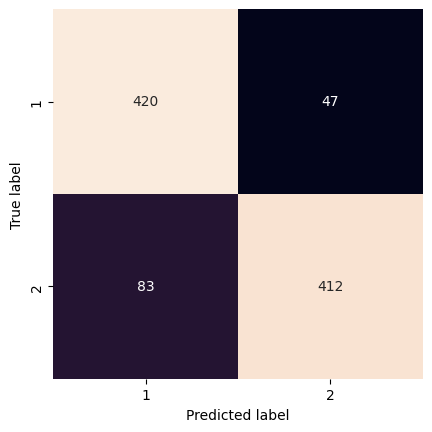

In [30]:
cvwosw_model = make_pipeline(CountVectorizer(ngram_range=(1,3), stop_words=sw), MultinomialNB())

cvwosw_model.fit(x_train, y_train)
preds = cvwosw_model.predict(x_test)

print("Model: CountVectorizer + MultinomialNB w/o stopwords")
print(f"Number of features: {len(cvwosw_model[0].vocabulary_)}")
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, preds)))
mat = confusion_matrix(y_test, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=cvwosw_model.classes_, yticklabels=cvwosw_model.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')

print(classification_report(y_test, preds, labels=cvwosw_model.classes_))

Model: TfidfVectorizer + MultinomialNB w/o stopwords
Number of features: 719389
Accuracy: 0.8628

              precision    recall  f1-score   support

           1       0.83      0.91      0.87       467
           2       0.91      0.82      0.86       495

    accuracy                           0.86       962
   macro avg       0.87      0.86      0.86       962
weighted avg       0.87      0.86      0.86       962



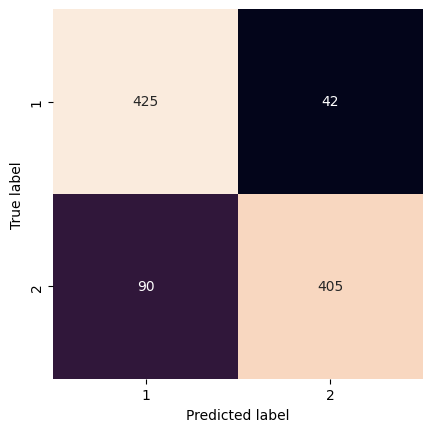

In [31]:
tfidfwosw_model = make_pipeline(TfidfVectorizer(ngram_range=(1,3), stop_words=sw), MultinomialNB())

tfidfwosw_model.fit(x_train, y_train)
preds = tfidfwosw_model.predict(x_test)

print("Model: TfidfVectorizer + MultinomialNB w/o stopwords")
print(f"Number of features: {len(tfidfwosw_model[0].vocabulary_)}")
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, preds)))
mat = confusion_matrix(y_test, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=tfidfwosw_model.classes_, yticklabels=tfidfwosw_model.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')

print(classification_report(y_test, preds, labels=tfidfwosw_model.classes_))

Vectorization using all n-grams in the original corpus still provides a model with better accuracy. However, removing stopwords has the advantage of reducing the number of features. To this end, another approach which can be tried is **lemmatization**, i.e. substituting all words in the corpus with their lemma, grouping together all inflected forms of the same word.

In [33]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 682.7 kB/s eta 0:00:19
     --------------------------------------- 0.1/12.8 MB 825.8 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 991.0 kB/s eta 0:00:13
     --------------------------------------- 0.2/12.8 MB 984.6 kB/s eta 0:00:13
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      -------------------------------------- 0.3/12.8 MB 983.0 kB/s eta 0:00:13
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.6 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.0 MB/s eta 0:00:07
     --- ------------------------------------ 1.1/12.8 MB 2.2 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/12.8


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Lemmatization is the process of reducing words to their base or dictionary form (lemma) while preserving meaning

In [ ]:
spcy = spacy.load('en_core_web_sm') #Loads SpaCy's small English language model (en_core_web_sm), which includes features like tokenization, lemmatization, and part-of-speech tagging.

x_train_lemm = x_train.apply(lambda x: ' '.join([w.lemma_ for w in spcy(x)]))
x_test_lemm = x_test.apply(lambda x: ' '.join([w.lemma_ for w in spcy(x)]))

Model: CountVectorizer + MultinomialNB lemmatized
Number of features: 844426
Accuracy: 0.8753

              precision    recall  f1-score   support

           1       0.84      0.92      0.88       467
           2       0.92      0.83      0.87       495

    accuracy                           0.88       962
   macro avg       0.88      0.88      0.88       962
weighted avg       0.88      0.88      0.88       962



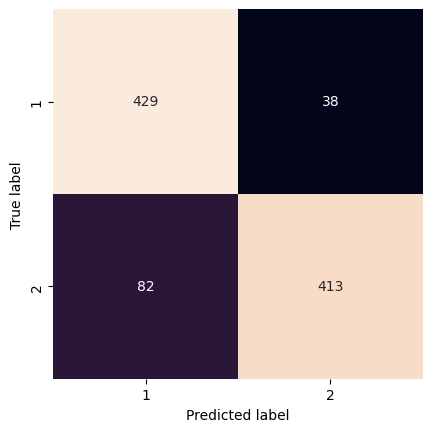

In [35]:
cvlemm_model = make_pipeline(CountVectorizer(ngram_range=(1,3)), MultinomialNB())

cvlemm_model.fit(x_train_lemm, y_train)
preds = cvlemm_model.predict(x_test_lemm)

print("Model: CountVectorizer + MultinomialNB lemmatized")
print(f"Number of features: {len(cvlemm_model[0].vocabulary_)}")
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, preds)))
mat = confusion_matrix(y_test, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=cvlemm_model.classes_, yticklabels=cvlemm_model.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')

print(classification_report(y_test, preds, labels=cvlemm_model.classes_))

Lemmatizing gives better results than removing stopwords, and it further reduces the number of features. However, the accuracy is still not as good as compared to using the original text.

*****************************
### Model Comaprison
So far, we have developed **Text Vectorization Models**, and the models are now being checked by their accuracy scores. So, let's get to the comaparison of the deployed models.

|Models|Accuracy Score|
|:-:|:-:|
|CountVectorizer + MultinomialNB|88.60|
|TfidfVectorizer + MultinomialNB|88.20|
|CountVectorizer + MultinomialNB w/o stopwords|86.49|
|TfidfVectorizer + MultinomialNB w/o stopwords|86.28|
|CountVectorizer + MultinomialNB lemmatized|87.53|

### Observation
As the accuracy score provides that the Lemmatizing provides better results than removing stopwords, and it further reduces the number of features. However, the accuracy is still not as good as compared to using the original text.

Now let's get into the Deep Learning methods...
******************************

## 3. Deep Learning <a id=3></a>

Neural networks have proved to be extremely effective tools for NLP tasks. They generally provide significant improvements compared to standard ML models based on text features, even with minimal preprocessing (tokenization and numericalization of tokens is often enough). We will deploy two different models: one based on a Long Short-Term Memory (LSTM) recurrent neural network architecture and one using a state of the art transformer architecture. We will use PyTorch + fastai for implementation, together with huggingface Transformers library.

### 3.1 LSTM <a id=3.1></a>

We use the `AWD-LSTM` architecture.

We first finetune on our corpus the **language model** (whose task is predicting the next token in the text based on the previous ones), before using it to build a classifier (*transfer learning*). Preprocessing is done by tokenizing with SpaCy and adding special tokens for capitalization, repetitions, beginning of strings, etc.

In [ ]:
lm_dblock = DataBlock(blocks=TextBlock.from_df('text', is_lm=True), #language model 
                   get_x=ColReader('text'),
                   splitter=IndexSplitter(range(train_len, len(df))))
lm_dls = lm_dblock.dataloaders(df, bs=32, seq_len=72)

lm_dls.show_batch(dataloaders=lm_dls, max_n=4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


,text,text_
0,xxbos keep xxunk people . i listened to the cd and i love it because it will really bring the spirit out of you and it also xxunk me to keep going forward without xxunk to look back . xxbos xxmaj feel xxmaj good xxmaj album . xxmaj huge xxmaj frankie xxunk xxunk could listen to there xxmaj music all day / all night . the xxunk is smooth . xxunk at,keep xxunk people . i listened to the cd and i love it because it will really bring the spirit out of you and it also xxunk me to keep going forward without xxunk to look back . xxbos xxmaj feel xxmaj good xxmaj album . xxmaj huge xxmaj frankie xxunk xxunk could listen to there xxmaj music all day / all night . the xxunk is smooth . xxunk at xxmaj
1,"interested , beware this cap runs small xxrep 3 ! i am a 67 year old women who happens to have a small head . i like this xxmaj cap so much that i ordered the xxmaj red one . i can always count on xxmaj amazon to meet my needs ! ! xxbos xxmaj if you can just get through the first 100 pages … . … then you 'll probably",", beware this cap runs small xxrep 3 ! i am a 67 year old women who happens to have a small head . i like this xxmaj cap so much that i ordered the xxmaj red one . i can always count on xxmaj amazon to meet my needs ! ! xxbos xxmaj if you can just get through the first 100 pages … . … then you 'll probably get"
2,"thought it should have focused more on xxmaj pete 's life story , his dreams before being famous , meeting xxmaj carl and forming the xxmaj xxunk , then the xxmaj xxunk etc , but it does not really do that . xxmaj anyways , if you 're a fan of xxmaj pete you should definitely buy it . xxbos xxmaj charge ! . xxmaj scott uses the metaphor of being a","it should have focused more on xxmaj pete 's life story , his dreams before being famous , meeting xxmaj carl and forming the xxmaj xxunk , then the xxmaj xxunk etc , but it does not really do that . xxmaj anyways , if you 're a fan of xxmaj pete you should definitely buy it . xxbos xxmaj charge ! . xxmaj scott uses the metaphor of being a rhino"
3,"was a great show that should have never been cancelled . xxmaj even though we , the fans , could n't get it back we sort of xxunk and asked for xxup dvd xxmaj box sets . xxmaj it took us about two years but our hard work paid off . xxmaj this sounds like a great box set and it will greatly appreciated it my collection . xxmaj the only thing","a great show that should have never been cancelled . xxmaj even though we , the fans , could n't get it back we sort of xxunk and asked for xxup dvd xxmaj box sets . xxmaj it took us about two years but our hard work paid off . xxmaj this sounds like a great box set and it will greatly appreciated it my collection . xxmaj the only thing i"


Fastai provides a very convenient *learning rate finder* to determine the best learning rate. The training of the neural network will be then performed using the **1cycle** policy (each epoch features a *warmup phase*, where the learning rate is gradually increased, followed by an *annealing phase*, where the lr decreases back to the minimum).

d:\PyCham_Projects\Amazon_Products_Reviews_Classification\venv\Lib\site-packages\fastai\text\learner.py:149: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



d:\PyCham_Projects\Amazon_Products_Reviews_Classification\venv\Lib\site-packages\fastai\text\learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



SuggestedLRs(valley=0.0020892962347716093)

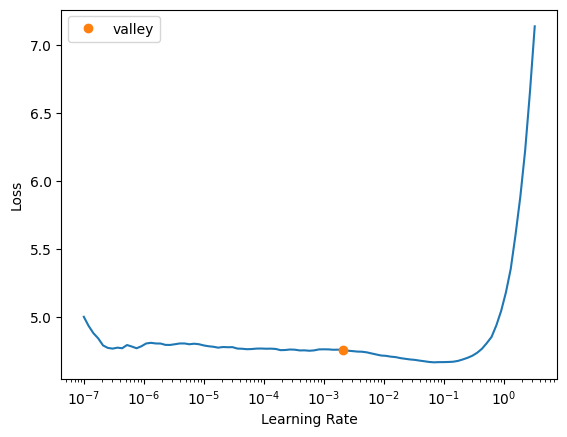

In [37]:
lm_learn = language_model_learner(lm_dls, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, perplexity])
lm_learn.lr_find()

In [38]:
lm_learn.fit_one_cycle(3, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.140985,4.040742,0.272619,56.868519,19:15
1,3.880191,3.965594,0.280935,52.751610,18:58
2,3.607657,3.952485,0.281684,52.064602,19:08


In [39]:
lm_learn.save_encoder('lstm_finetuned')

clas_dblock = DataBlock(blocks=(TextBlock.from_df('text', vocab=lm_dls.vocab), CategoryBlock),
                        get_x=ColReader('text'), get_y=ColReader('label'),
                        splitter=IndexSplitter(range(train_len, len(df))))

clas_dls = clas_dblock.dataloaders(df, bs=32, seq_len=72, dl_type=SortedDL)

clas_dls.show_batch(dls=clas_dls, max_n=5)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


,text,category
0,"xxbos xxup just xxup okay . xxup okay xxup halo 1 xxup rocked xxup we xxup all xxup know xxup that ! xxup we xxup also xxup know xxup that xxup halo 2 xxup had xxup so xxup much xxup hype xxup that xxup it xxup would xxup be xxup nearly xxup impossible xxup to xxup live xxup up xxup to . i xxup played xxup the xxup game xxup and xxup really xxup got xxup into xxup it , xxup it xxup was xxup awesome . xxup but xxup before i xxup knew xxup it xxup it xxup was xxup over . xxup and xxup the xxup covenant xxup was xxup attacking xxup earth xxup right ? xxup that xxup is xxup so xxup much xxup fun xxup to xxup defend xxup the xxup earth xxup and xxup urban xxup warfare xxup and xxup all xxup that xxup but",2
1,xxbos xxup air xxup compressor xxup received xxup was n't xxup the xxup one xxup advertised . xxup the xxup air xxup compressor xxup advertised xxup was xxup one xxup that xxup could xxup pump xxup up xxup to 300 xxup xxunk xxup within 3 xxup minutes . xxup it xxup could xxup handle xxup truck xxup tires xxup for xxup only $ xxunk . i xxup thought xxup that xxup it xxup was a xxup great xxup deal xxup especially xxup when xxup that xxup same xxup compressor xxup at xxup the xxup xxunk xxup would xxup cost xxup about $ xxunk . i xxup was xxup fooled xxup and xxup miss xxup guided . xxup the xxup compressor xxup that i xxup received xxup ca nt xxup pump xxup up xxup truck xxup tires xxup at xxup all . xxup just xxup to xxup pump xxup up a,1
2,xxbos 21 xxmaj hot xxmaj rockin ' xxmaj canadian xxmaj country xxmaj hits . xxmaj track xxmaj xxunk . xxup jim xxup xxunk : xxmaj xxunk xxmaj xxunk . xxup anita xxup xxunk : xxmaj this xxmaj country 's xxmaj xxunk . xxup michelle xxup wright : xxmaj rock xxmaj me xxmaj xxunk . xxup lisa xxup xxunk : xxmaj country xxmaj xxunk . xxup gary xxup xxunk : xxmaj train xxmaj of xxmaj xxunk . xxup david xxup stone : xxmaj old xxmaj town xxmaj xxunk . xxup xxunk xxup scott : xxmaj the xxmaj moon xxmaj she xxmaj xxunk . xxup xxunk xxup daughter : xxmaj girls xxmaj will xxmaj be xxmaj xxunk . xxup ray xxup xxunk & xxup swift xxup current : xxmaj it 's xxmaj not xxmaj the xxmaj right xxmaj xxunk . xxup peter xxup wild : xxmaj satisfied xxmaj xxunk . xxup cindy,2
3,"xxbos xxmaj elvis xxmaj presley 's perfomance xxmaj so xxmaj close xxmaj but xxmaj yet xxmaj so xxmaj far .. xxmaj this is the xxunk xxmaj elvis xxmaj presley film i saw . xxmaj in fact , i do n't know why it was even made . xxmaj in fact , this movie needs zero stars . xxmaj but … wo n't go that xxunk have to wonder why xxmaj elvis xxmaj presley stars in this hoo - hum movie . xxmaj johnny xxmaj xxunk ( elvis xxmaj presley ) is a xxmaj american actor who gets xxunk the movie begins , we see xxmaj johnny watching a movie ( with him in it . ) xxmaj while his missing , he meets a princess ( mary xxmaj ann xxmaj xxunk ) . xxmaj xxunk who likes this movie , he / she needs to get thier eyes xxunk is",1
4,"xxbos "" and xxmaj as xxmaj you xxmaj can xxmaj see , xxmaj he 's xxmaj got xxmaj an xxmaj axe xxmaj in xxmaj his xxmaj head … "" . xxmaj this black comedy is not great art . xxmaj it 's silly , cheesy , and totally ridiculous … .and i like it ! ! . xxmaj i 'm always a sucker for stupid b movie films like this . xxmaj it 's fun and funny in a really stupid way . xxmaj andrew xxmaj xxunk stars as a kid who has the xxunk for a girl . xxmaj in an attempt to show off to her , he gets killed by a store xxunk . xxmaj he comes back as a zombie and begins to live life as if nothing ever happened . xxmaj of course , there are certain body parts that fall off and stuff ,",1


We load the language model weights in our classifier and then look for the best learning rate.

d:\PyCham_Projects\Amazon_Products_Reviews_Classification\venv\Lib\site-packages\fastai\text\learner.py:149: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

d:\PyCham_Projects

d:\PyCham_Projects\Amazon_Products_Reviews_Classification\venv\Lib\site-packages\fastai\text\learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



SuggestedLRs(valley=0.0030199517495930195)

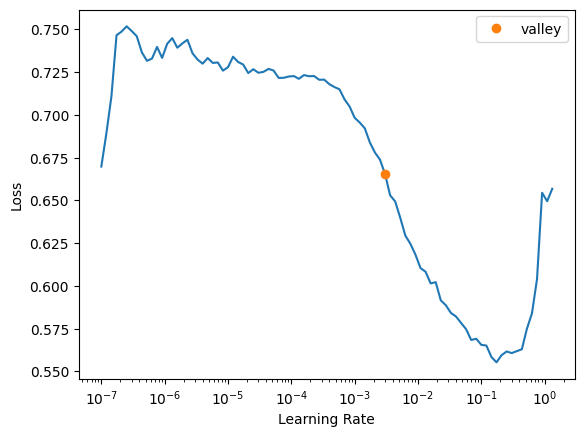

In [ ]:
clas_learn = text_classifier_learner(clas_dls, AWD_LSTM, seq_len=72, metrics=accuracy)
clas_learn.load_encoder('lstm_finetuned')
clas_learn.freeze() 

clas_learn.lr_find()

In order to train the classifier it is often a good choice to **gradually unfreeze** the layers of the NN, starting from training just the head (which at the moment contains random weights).

In [41]:
clas_learn.fit_one_cycle(1, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.401769,0.302175,0.866944,15:26


d:\PyCham_Projects\Amazon_Products_Reviews_Classification\venv\Lib\site-packages\fastai\text\learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



SuggestedLRs(valley=1.2022644114040304e-05)

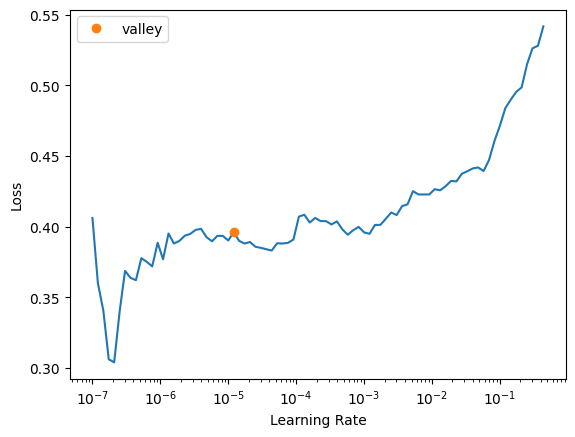

In [42]:
clas_learn.freeze_to(-2)
clas_learn.lr_find()

In [43]:
clas_learn.fit_one_cycle(1, lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.387409,0.287985,0.873181,08:37


d:\PyCham_Projects\Amazon_Products_Reviews_Classification\venv\Lib\site-packages\fastai\text\learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



SuggestedLRs(valley=1.9054607491852948e-06)

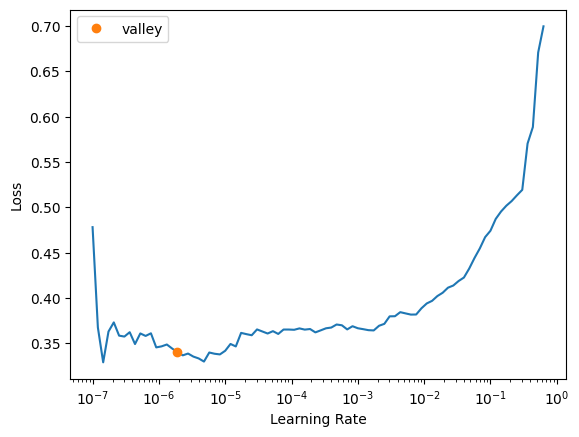

In [44]:
clas_learn.freeze_to(-3)
clas_learn.lr_find()

In [45]:
clas_learn.fit_one_cycle(1, lr_max=3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.353849,0.262107,0.887734,12:06


We now unfreeze all remaining layers and train for a few more epochs with discriminative learning rates (lower lr for early layers, higher lr for later ones).

d:\PyCham_Projects\Amazon_Products_Reviews_Classification\venv\Lib\site-packages\fastai\text\learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



SuggestedLRs(valley=0.00019054606673307717)

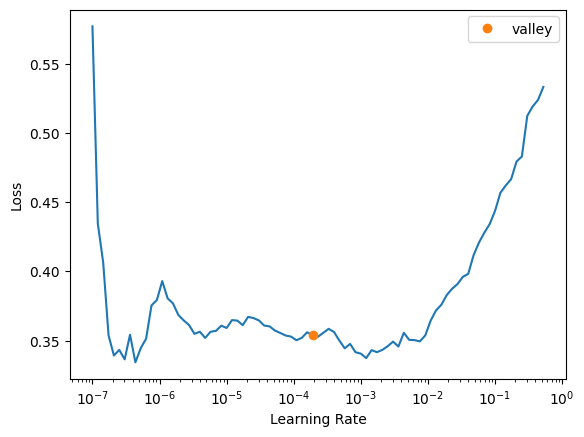

In [46]:
clas_learn.unfreeze()
clas_learn.lr_find()

In [47]:
clas_learn.fit_one_cycle(3, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.347135,0.255562,0.899168,16:09
1,0.346866,0.244074,0.896050,20:48
2,0.320069,0.249351,0.898129,18:33


              precision    recall  f1-score   support

           1       0.86      0.94      0.90       467
           2       0.94      0.86      0.90       495

    accuracy                           0.90       962
   macro avg       0.90      0.90      0.90       962
weighted avg       0.90      0.90      0.90       962



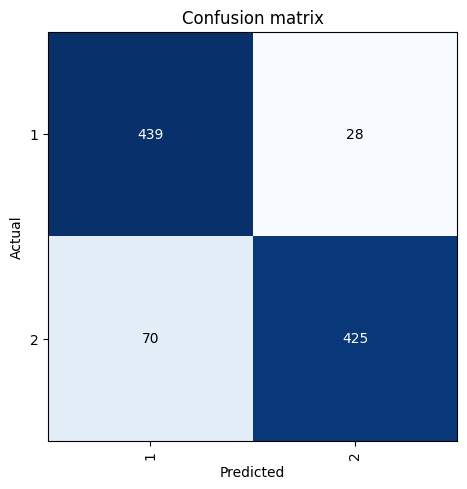

In [48]:
interp = ClassificationInterpretation.from_learner(clas_learn)

interp.print_classification_report()
interp.plot_confusion_matrix()

### Observation from LSTM
**The LSTM model has reached an accuracy of 90%, significantly higher than the baseline obtained by using text features and with much more homogeneous precision and recall for the two classes. It is worth observing that the validation dataset contains wrongly labeled samples, as we can see by analyzing the top losses.**

In [49]:
interp.plot_top_losses(k=8)

,input,target,predicted,probability,loss
0,"xxbos xxmaj standard xxmaj machine . xxmaj good value for the price i paid . i bought it for use on office work and internet surfing . xxmaj it 's not too flashy , but it could use another xxmaj gig of xxup ram . xxmaj all complaints i have about it so far stem from the xxmaj vista operating system , not the xxup pc xxunk of my troubles : i had to hunt to find out how to create a system restore disk ( my last few pc 's were annoyingly in my face telling me to make one … i miss xxunk often wo n't stay in sleep xxunk took me almost 2 hours to get my usb connected printer working because i as the xxunk did n't have the authority to xxunk , i expected the 64 bit version of xxmaj vista to come pre loaded",2,1,0.9324436187744141,3.938453197479248
1,"xxbos xxmaj not so good of an ending ! . xxmaj this was my first xxmaj stuart xxmaj woods novel that did n't have the xxmaj stone xxmaj xxunk character in it . i was n't exactly sure what to expect , but i really loved the xxmaj michael / xxmaj vinnie character . i thought that xxmaj woods did a great job of developing all of the characters in the book . xxmaj there was a great plot , too . i was n't exactly sure how the novel was going to end , but i definitely did n't expect the actual ending . i felt that xxmaj woods could have done a much better job with the ending after having enjoyed the other parts of the book so much . xxmaj not that the ending was bad , it was just a little too far fetched and so",2,1,0.959409236907959,3.3529632091522217
2,"xxbos a vastly amusing movie . i was pleasantly surprised by this movie . xxmaj while it lacks the lovely atmospheric creepiness of the xxunk film it claims to be a remake of , it has a good - xxunk sense of adventure and is well cast . xxmaj in truth it seems to be more of a remake in the style of xxmaj hammer xxmaj studio 's xxmaj mummy films , but thankfully does not include the title character xxunk around shedding xxunk everywhere . xxmaj considering the stomach - dropping , heart - sickening disappointment the other big "" horror "" xxunk xxmaj haunting , "" from the summer this film came out , and despite the occasional plot - hole ( but let 's face it , this film was n't intended to be a ground - breaking , truth - shattering film , it was meant",2,1,0.9122431874275208,3.2042150497436523
3,"xxbos xxmaj abrupt xxmaj end . xxmaj i 've enjoyed other books by mccullough but was disappointed in this one . xxmaj just after describing tr 's engagement announcement , mccullough abruptly ended the book . a brief "" afterword "" describes what happened to the main xxunk my curiosity about tr 's presidency , his second marriage , his daughter xxmaj alice 's xxunk and so on remains xxunk got the feeling xxunk was n't overly fond of xxup tr and perhaps that 's why he abandoned the project of writing his bio .",2,1,0.9805216789245605,2.7846224308013916
4,"xxbos xxmaj nothing xxmaj wrong xxmaj with xxmaj this xxmaj development . xxmaj this show would have to be one of the funniest shows that i have ever watched xxrep 4 ! xxmaj the acting is superb and the script you can not xxunk show manages to be so politically incorrect although it does n't appear xxunk offensive , it is mainly the characters stupidity that makes the the joke even funnier .",2,1,0.9650194048881531,2.711111068725586
5,"xxbos xxmaj thank xxmaj you . xxmaj if you are not a fan of xxmaj elton 's music , buy this album , i guarantee , the next time you hear xxmaj elton 's voice on the radio , you will come to appreciate it , more than you ever thought possible !",1,2,0.938247561454773,2.6947925090789795
6,xxbos xxmaj fun but not a great workout . xxmaj this dvd is for people who already know these dance steps . xxmaj basically they dance and you 're expected to follow . i probably burned some calories running back and forth to keep up though .,1,2,0.9110062122344971,2.433185338973999
7,xxbos xxmaj no need for expensive cables . xxmaj not muc

In [51]:
# Save the trained model
clas_learn.save('awd_lstm_model')


Path('models/awd_lstm_model.pth')

In [52]:
import os
os.makedirs('/content/models', exist_ok=True)
clas_learn.export('/content/models/lstm_finetuned')


In [53]:
!ls /content/models


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
#prompt: it want to create ui using streamlit so to use the saved model in app.py .please save the lstm model in the pkl file . consider this last time i have saves the model but at load time it giving the errors  this  NotImplementedError: cannot instantiate 'PosixPath' on your system.

import pickle
# Assuming 'clas_learn' is your trained LSTM model from the previous code
# Save the model to a .pkl file
with open('lstm_model.pkl', 'wb') as f:
    pickle.dump(clas_learn, f)

Prediction using the lstm_model.pkl


In [56]:
# prompt: write the code to load the lstm_model.pkl ?

import pickle

# Load the saved model from the .pkl file
with open('lstm_model.pkl', 'rb') as f:
    loaded_lstm_model = pickle.load(f)

In [57]:
# Function to predict sentiment
def predict_review(review_text):
    prediction, class_idx, probabilities = loaded_lstm_model.predict(review_text)
    return "Positive review" if prediction == "2" else "Negative review", probabilities

# Function to take review input and predict sentiment
def get_sentiment(review_text):
    sentiment, probabilities = predict_review(review_text)
    print(f"Sentiment: {sentiment}")
    print(f"Probabilities: {probabilities}")
    return sentiment, probabilities

In [58]:
# negative review Example usage:
review_text = "Lawless or Hopeless?. This film wanders through the hill country during prohibition. What should be prohibitedis making movies that look like they have a possibility and then never deliver. Don't drinkthis moonshine, it will make you go blind!"
get_sentiment(review_text)

Sentiment: Negative review
Probabilities: tensor([0.9799, 0.0201])


('Negative review', tensor([0.9799, 0.0201]))

The tensor([0.9799, 0.0201]) represents the model's confidence in each class:

- 0.9799: The model is 97.99% confident that the review is negative.
- 0.0201: The model is 2.01% confident that the review is positive.

In [59]:
# positive example Example usage:
review_text = "This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^"
get_sentiment(review_text)

Sentiment: Positive review
Probabilities: tensor([0.0692, 0.9308])


('Positive review', tensor([0.0692, 0.9308]))

Using the Fastai technique to load and predict the output

In [60]:
# prompt: load the save model lstm model  and predict also on it

from fastai.text.all import *
import os

# Load the saved model
learn_inf = load_learner('/content/models/lstm_finetuned')

Logic for the prediction

In [61]:
# Function to predict sentiment
def predict_review1(review_text):
    prediction, class_idx, probabilities = learn_inf.predict(review_text)
    return "Positive review" if prediction == "2" else "Negative review", probabilities

# Function to take review input and predict sentiment
def get_sentiment1(review_text):
    sentiment, probabilities = predict_review1(review_text)
    print(f"Sentiment: {sentiment}")
    print(f"Probabilities: {probabilities}")
    return sentiment, probabilities

In [62]:
# negative review Example usage:
review_text = "Lawless or Hopeless?. This film wanders through the hill country during prohibition. What should be prohibitedis making movies that look like they have a possibility and then never deliver. Don't drinkthis moonshine, it will make you go blind!"
get_sentiment1(review_text)

Sentiment: Negative review
Probabilities: tensor([0.9799, 0.0201])


('Negative review', tensor([0.9799, 0.0201]))

In [63]:
# positive example Example usage:
review_text = "This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^"
get_sentiment1(review_text)

Sentiment: Positive review
Probabilities: tensor([0.0692, 0.9308])


('Positive review', tensor([0.0692, 0.9308]))